# Algoritmos de Alisamiento Exponencial

- Los métodos de previsión se basan en la idea de que las observaciones pasadas contienen información sobre el patrón de comportamiento de la serie de tiempo.

- El algoritmo de alisamiento exponencial intenta tratar este problema. 

- Los algoritmos no tienen un desarrollo probabilístico que pruebe su eficiencia, pero en la práctica son muy útiles por su simplicidad y eficiencia computacional.




## Suavizado exponencial: 

- Técnica para suavizar datos de series de tiempo utilizando una función de ventana exponencial. 

- Difiere  del promedio móvil simple, con el tiempo las funciones exponenciales asignan pesos exponencialmente decrecientes. 
  + Los pesos mayores se asignan a los valores u observaciones recientes, mientras que los pesos menores se asignan a los valores u observaciones más antiguos. 
  
- Entre muchas funciones de ventana, en el procesamiento de señales, la función de suavizado exponencial generalmente se aplica para suavizar datos donde actúa como un filtro de paso bajo para eliminar el ruido de alta frecuencia. 
  





## Suaviamiento exponencial simple - **SES** (simple exponencial smoothing)

Este procedimiento es adecuado cuando los datos no tienen tendencia o patrón estacional. Los pesos de cada observación son determinados por un parámetro de suavizamiento $\alpha$. 

Para un conjunto de datos con $T$ observaciones , calculamos el valor predicho $\hat{y}_{t+1}$, el cual estará basado en $y_1$ a través de $y_t$ de la siguiente forma:

$$\hat{y}_{t+1}=\alpha y_t+\alpha(1-\alpha)y_{t−1}+...+\alpha(1−\alpha)^{t−1}y_1$$


Donde:

- $0< \alpha < 1$. 
- $\alpha$ puede ser visto como una tasa de aprendizaje. 

- Valores cercanos a cero son considerados como aprendizaje lento ya que se da más peso a información histórica
- Valores cercanos a 1 son considerados como aprendizaje rápido porque el algoritmo da más peso a las observaciones recientes.


In [27]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing

"C:\Users\wsand\Documents\GitHub\Series-de-Tiempo\CUADERNOS\airpassengers.csv"

In [28]:
airline = pd.read_csv("https://raw.githubusercontent.com/Wilsonsr/Series-de-Tiempo/main/CUADERNOS/airpassengers.csv", parse_dates=True, sep=";")
airline

,Unnamed: 0,x
0,1,112
1,2,118
2,3,132
3,4,129
4,5,121
...,...,...
139,140,606
140,141,508
141,142,461
142,143,390


In [29]:
date_range = pd.date_range(start="1949-01", end="1961-01", freq='ME')
date_range

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='ME')

In [30]:
airline.index=date_range

In [31]:
airline.drop(columns=["Unnamed: 0"], axis=1, inplace=True)
airline.rename(columns={"x": "Cantidad de pasajeros"}, inplace=True)

In [32]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-31 to 1960-12-31
Freq: ME
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Cantidad de pasajeros  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [33]:
airline

,Cantidad de pasajeros
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121
...,...
1960-08-31,606
1960-09-30,508
1960-10-31,461
1960-11-30,390


<Axes: title={'center': 'Cantidad de Pasajeros'}>

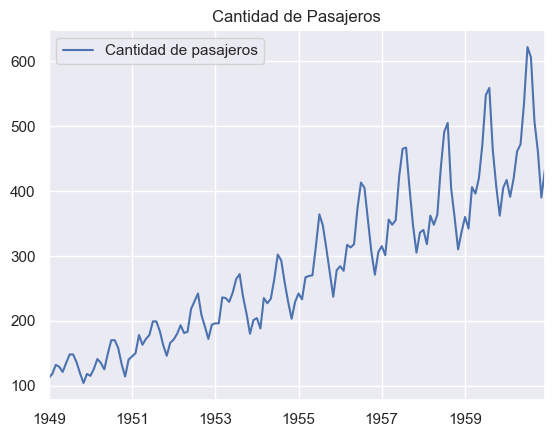

In [34]:
# plotting the original data
airline[['Cantidad de pasajeros']].plot(title='Cantidad de Pasajeros')

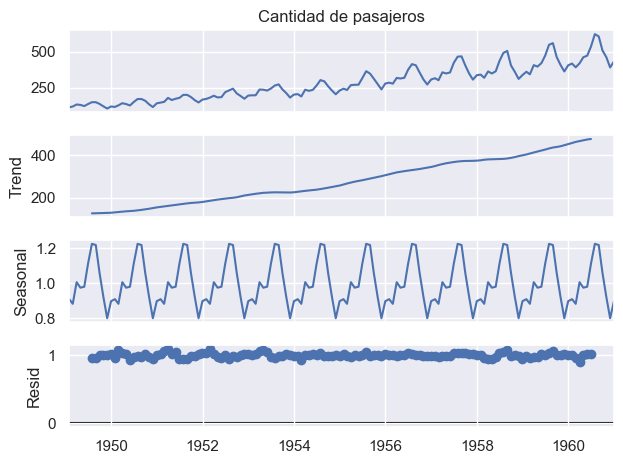

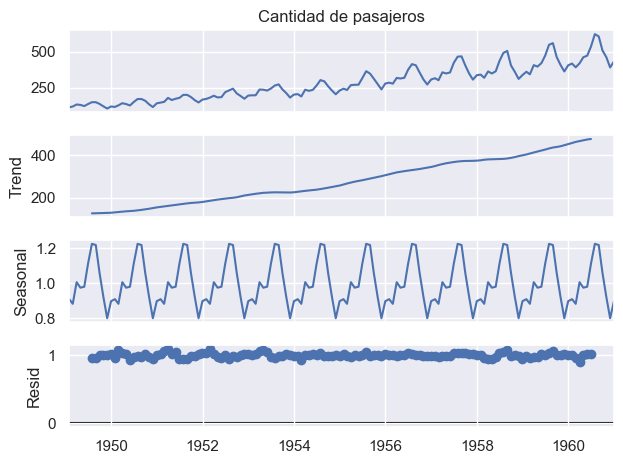

In [35]:
decompose_result = seasonal_decompose(airline["Cantidad de pasajeros"],model="multiplicative")
decompose_result.plot()

Ajuste de los datos con suavizado exponencial de Holt-Winters
Ahora ajustaremos estos datos al suavizado exponencial simple, doble y triple respectivamente, y veremos cómo funciona.

Antes de comenzar con los modelos, primero definiremos el coeficiente de peso Alfa y el Período de Tiempo. También configuramos la frecuencia DateTime a un nivel mensual.

In [36]:
# Establezca la frecuencia del índice de fecha y hora como Inicio mensual como lo indican los datos aerolínea.index.freq = 'MS'
# Establezca el valor de Alfa y defina m (Período de tiempo) 
m = 12 
alpha = 0.8

In [37]:
1/24

0.041666666666666664

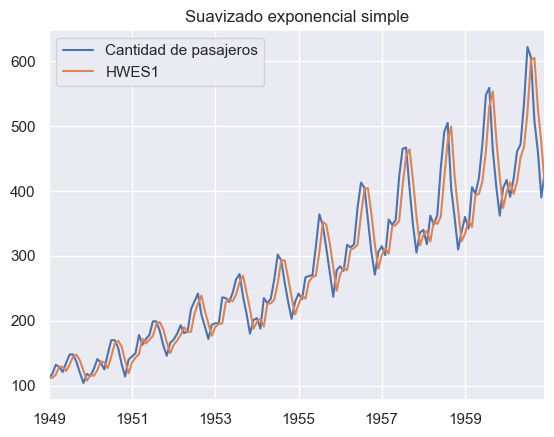

In [38]:
airline["HWES1"] = SimpleExpSmoothing(airline["Cantidad de pasajeros"]).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
airline[["Cantidad de pasajeros","HWES1"]].plot(title="Suavizado exponencial simple");

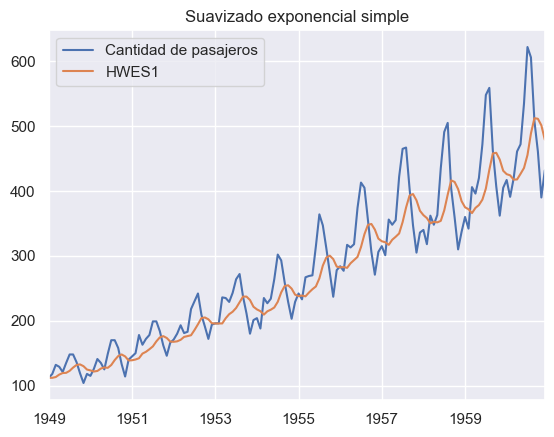

In [39]:
airline["HWES1"] = SimpleExpSmoothing(airline["Cantidad de pasajeros"]).fit(smoothing_level=0.2,optimized=False,use_brute=True).fittedvalues
airline[["Cantidad de pasajeros","HWES1"]].plot(title="Suavizado exponencial simple");

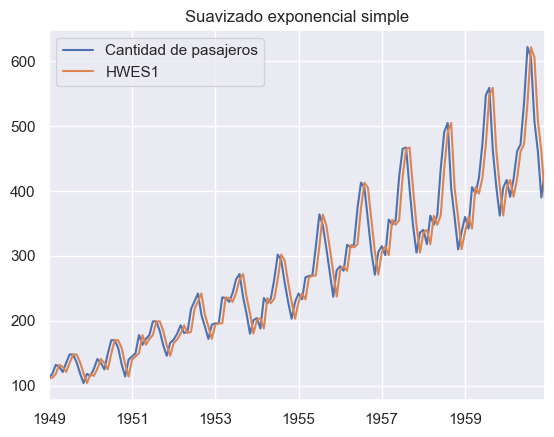

In [40]:
airline["HWES1"] = SimpleExpSmoothing(airline["Cantidad de pasajeros"]).fit(optimized=True,use_brute=True).fittedvalues
airline[["Cantidad de pasajeros","HWES1"]].plot(title="Suavizado exponencial simple");

In [41]:
import seaborn as sns
sns.set_theme()

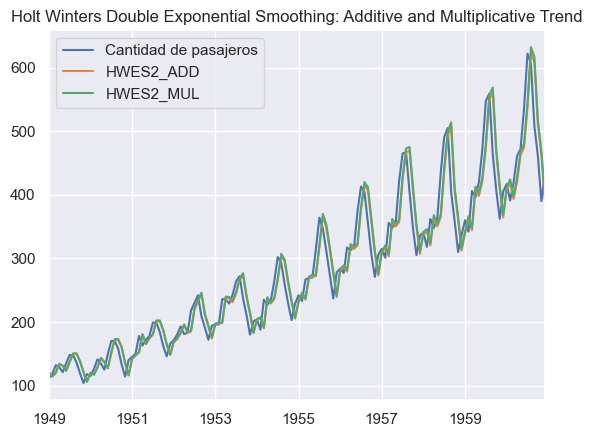

In [42]:
airline["HWES2_ADD"] = ExponentialSmoothing(airline["Cantidad de pasajeros"],trend="add").fit().fittedvalues
airline["HWES2_MUL"] = ExponentialSmoothing(airline["Cantidad de pasajeros"],trend="mul").fit().fittedvalues
airline[["Cantidad de pasajeros","HWES2_ADD","HWES2_MUL"]].plot(title="Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend");

c:\Users\wsand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


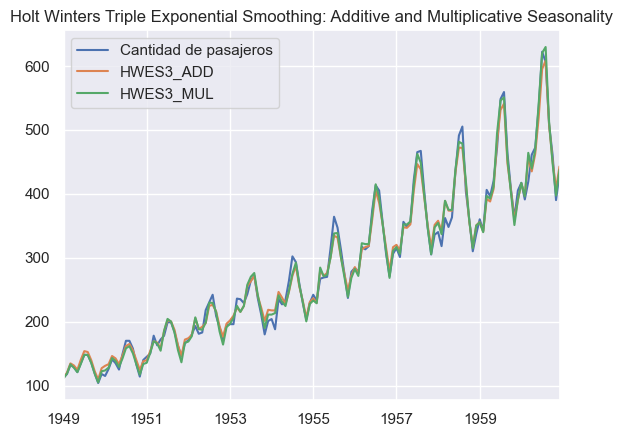

In [43]:
#Triple HWES
airline["HWES3_ADD"] = ExponentialSmoothing(airline["Cantidad de pasajeros"],trend="add",seasonal="add",seasonal_periods=12).fit().fittedvalues
airline["HWES3_MUL"] = ExponentialSmoothing(airline["Cantidad de pasajeros"],trend="mul",seasonal="mul",seasonal_periods=12).fit().fittedvalues
airline[["Cantidad de pasajeros","HWES3_ADD","HWES3_MUL"]].plot(title="Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality");

In [44]:
# Split into train and test set
train_airline = airline[:120]
test_airline = airline[120:]

In [45]:
test_airline

,Cantidad de pasajeros,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
1959-01-31,360,336.866231,338.934275,342.740670,355.593039,355.106140
1959-02-28,342,359.884331,361.954484,366.162463,340.722991,339.829068
1959-03-31,406,342.089422,344.157599,348.058370,391.786907,396.569339
1959-04-30,396,405.680447,407.754768,412.758291,387.843077,392.258122
1959-05-31,420,396.048402,398.121584,402.962931,407.526558,411.111097
1959-06-30,472,419.880242,421.955595,427.209646,482.297029,494.682244
1959-07-31,548,471.739401,473.819745,479.976829,530.933859,545.696472
1959-08-31,559,547.618697,549.706446,557.187594,540.812420,550.595459
1959-09-30,463,558.943093,561.031805,568.715959,447.115906,453.206704
1959-10-31,407,463.479715,465.558677,471.584076,405.344087,402.161108


c:\Users\wsand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


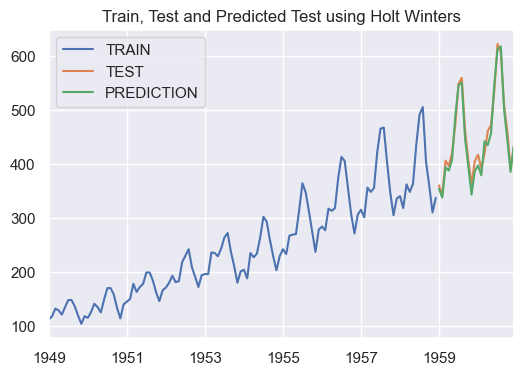

In [46]:
fitted_model = ExponentialSmoothing(train_airline["Cantidad de pasajeros"],trend="mul",seasonal="mul",seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(24)
train_airline["Cantidad de pasajeros"].plot(legend=True,label="TRAIN")
test_airline["Cantidad de pasajeros"].plot(legend=True,label="TEST",figsize=(6,4))
test_predictions.plot(legend=True,label="PREDICTION")
plt.title("Train, Test and Predicted Test using Holt Winters");

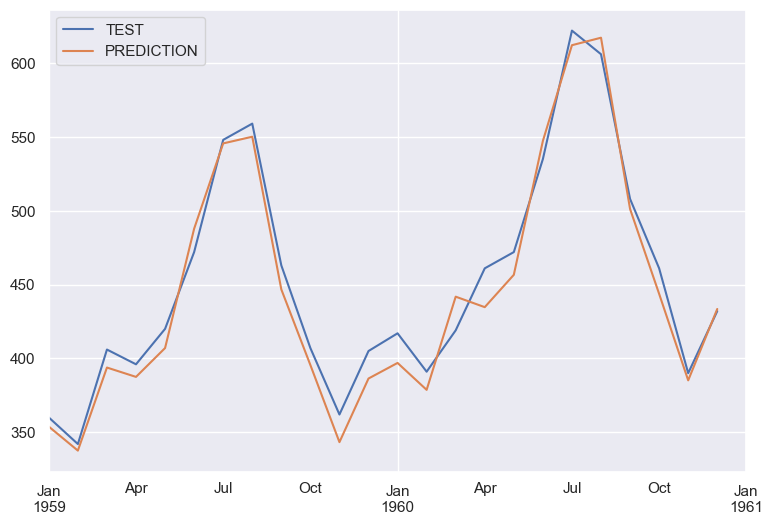

In [47]:
test_airline["Cantidad de pasajeros"].plot(legend=True,label="TEST",figsize=(9,6))
test_predictions.plot(legend=True,label="PREDICTION",xlim=["1959-01-01","1961-01-01"]);

In [48]:
test_predictions

1959-01-31    353.807396
1959-02-28    337.555643
1959-03-31    393.806030
1959-04-30    387.476190
1959-05-31    407.013603
1959-06-30    487.824131
1959-07-31    545.610812
1959-08-31    550.129220
1959-09-30    446.734901
1959-10-31    395.511073
1959-11-30    343.290056
1959-12-31    386.375412
1960-01-31    396.933962
1960-02-29    378.701238
1960-03-31    441.808141
1960-04-30    434.706738
1960-05-31    456.625622
1960-06-30    547.286370
1960-07-31    612.116829
1960-08-31    617.185998
1960-09-30    501.188658
1960-10-31    443.721016
1960-11-30    385.134634
1960-12-31    433.471784
Freq: ME, dtype: float64

In [49]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(test_airline["Cantidad de pasajeros"],test_predictions)
print(f'Error absoluto medio {mae}')
mean_squared_error(test_airline["Cantidad de pasajeros"],test_predictions)

Error absoluto medio 12.380724680796638


192.61506903304277

In [50]:
from math import*
sqrt(192)

13.856406460551018

In [51]:
#%pip install pycaret[full]

In [52]:
#from pycaret.datasets import get_data
#airline = get_data('airline')
#from pycaret.time_series import*
#exp_name = setup(data = airline,  fh = 12)
#best_model = compare_models()